<a href="https://colab.research.google.com/github/shikarRajcomar-Engineer/Ensemble/blob/master/Advanced_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path='/content/drive/My Drive/B1-Msc experiment/'    
Results=pd.DataFrame([])
Results1=pd.DataFrame([])
Results2=pd.DataFrame([])
Results3=pd.DataFrame([])
Results4=pd.DataFrame([])
Results5=pd.DataFrame([])
Results6=pd.DataFrame([])

aResults=pd.DataFrame([])
aResults1=pd.DataFrame([])
aResults2=pd.DataFrame([])
aResults3=pd.DataFrame([])
aResults4=pd.DataFrame([])
aResults5=pd.DataFrame([])
aResults6=pd.DataFrame([])

bResults=pd.DataFrame([])
bResults1=pd.DataFrame([])
bResults2=pd.DataFrame([])
bResults3=pd.DataFrame([])
bResults4=pd.DataFrame([])
bResults5=pd.DataFrame([])
bResults6=pd.DataFrame([])

cResults=pd.DataFrame([])
cResults1=pd.DataFrame([])
cResults2=pd.DataFrame([])
cResults3=pd.DataFrame([])
cResults4=pd.DataFrame([])
cResults5=pd.DataFrame([])
cResults6=pd.DataFrame([])

dResults=pd.DataFrame([])
dResults1=pd.DataFrame([])
dResults2=pd.DataFrame([])
dResults3=pd.DataFrame([])
dResults4=pd.DataFrame([])
dResults5=pd.DataFrame([])
dResults6=pd.DataFrame([])

eResults=pd.DataFrame([])
eResults1=pd.DataFrame([])
eResults2=pd.DataFrame([])
eResults3=pd.DataFrame([])
eResults4=pd.DataFrame([])
eResults5=pd.DataFrame([])
eResults6=pd.DataFrame([])

fResults=pd.DataFrame([])
fResults1=pd.DataFrame([])
fResults2=pd.DataFrame([])
fResults3=pd.DataFrame([])
fResults4=pd.DataFrame([])
fResults5=pd.DataFrame([])
fResults6=pd.DataFrame([])



Dataset7=['candy224']
Dataset8=['composition_vii224']
Dataset9=['feathers224']
Dataset10=['la_muse224']
Dataset11=['mosaic224']
Dataset12=['starry_night224']
Dataset13=['the_scream224']
# Dataset14=['the_wave224']
# Dataset15=['udnie224']
# Dataset16=['samplepair224']






# candy224

Using TensorFlow backend.


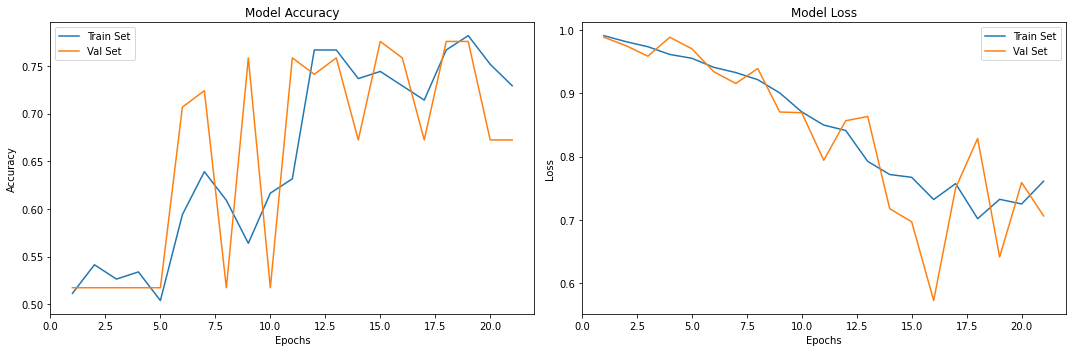

Train: 0.759, Test: 0.776


,Class 0,Class 1,accuracy,macro avg,weighted avg,aug,dataset,val acc,acc
precision,0.941176,0.707317,0.775862,0.824247,0.820215,No Aug,Original,67.241377,72.932333
recall,0.571429,0.966667,0.775862,0.769048,0.775862,No Aug,Original,67.241377,72.932333
f1-score,0.711111,0.816901,0.775862,0.764006,0.765830,No Aug,Original,67.241377,72.932333
support,28.000000,30.000000,0.775862,58.000000,58.000000,No Aug,Original,67.241377,72.932333


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



path='/content/drive/My Drive/B1-Msc experiment/'    



batch_size=32
steps=100




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results=Results.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results1=Results1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results1)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results2=Results2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results2)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results3=Results3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results3)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results4=Results4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results4)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results5=Results5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results5)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['candy224','candy224','candy224','candy224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
Results6=Results6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results6)
keras.backend.clear_session()


# composition_vii224 Dataset

In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



batch_size=32
steps=100


hist_results=[]


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))

optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults=aResults.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight







# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults1=aResults1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults1)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight







# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults2=aResults2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults2)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults3=aResults3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults3)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults4=aResults4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults4)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults5=aResults5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults5)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset1[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['composition_vii224','composition_vii224','composition_vii224','composition_vii224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
aResults6=aResults6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(aResults6)
keras.backend.clear_session()


# Vertical Flipping

In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



batch_size=32
steps=100


hist_results=[]


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['Vflip224','Vflip224','Vflip224','Vflip224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults=bResults.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(bResults)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight







# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['Vflip224','Vflip224','Vflip224','Vflip224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults1=bResults1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(bResults1)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight







# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['Vflip224','Vflip224','Vflip224','Vflip224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults2=bResults2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(bResults2)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['Vflip224','Vflip224','Vflip224','Vflip224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults3=bResults3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(bResults3)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['Vflip224','Vflip224','Vflip224','Vflip224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults4=bResults4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(bResults4)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['Vflip224','Vflip224','Vflip224','Vflip224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults5=bResults5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(bResults5)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset2[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['Vflip224','Vflip224','Vflip224','Vflip224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
bResults6=bResults6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Results6)
keras.backend.clear_session()


# la_muse224 Dataset

In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




batch_size=32
steps=100




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults=cResults.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults1=cResults1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults1)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults2=cResults2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults2)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults3=cResults3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults3)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults4=cResults4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults4)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults5=cResults5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults5)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset3[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['la_muse224','la_muse224','la_muse224','la_muse224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
cResults6=cResults6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(cResults6)
keras.backend.clear_session()


#mosaic224 Dataset

In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




batch_size=32
steps=100




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults=dResults.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults1=dResults1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults1)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults2=dResults2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults2)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults3=dResults3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults3)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults4=dResults4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults4)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults5=dResults5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults5)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset4[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['mosaic224','mosaic224','mosaic224','mosaic224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
dResults6=dResults6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(dResults6)
keras.backend.clear_session()


# starry_night224 Dataset

In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




batch_size=32
steps=100




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults=eResults.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults1=eResults1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults1)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults2=eResults2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults2)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults3=eResults3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults3)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight








# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults4=eResults4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults4)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults5=eResults5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults5)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['starry_night224','starry_night224','starry_night224','starry_night224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults6=eResults6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults6)
keras.backend.clear_session()


#the_scream224 Dataset

In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




batch_size=32
steps=100




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['No Aug','No Aug','No Aug','No Aug']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults=eResults.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight






# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(horizontal_flip=True)
val_datagen =  ImageDataGenerator(horizontal_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['HorizontalFlip','HorizontalFlip','HorizontalFlip','HorizontalFlip']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults1=eResults1.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults1)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(vertical_flip=True)
val_datagen =  ImageDataGenerator(vertical_flip=True)


# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['vertialFLip','vertialFLip','vertialFLip','vertialFLip']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults2=eResults2.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults2)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight





# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))
val_datagen =  ImageDataGenerator(rotation_range=(random.randrange(0,360,30)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Rotate','Rotate','Rotate','Rotate']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults3=eResults3.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults3)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight








# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(shear_range=(random.randrange(0,100,10)))
val_datagen =  ImageDataGenerator(shear_range=(random.randrange(0,100,10)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Shear','Shear','Shear','Shear']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults4=eResults4.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults4)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight



# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(width_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['Width','Width','Width','Width']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults5=eResults5.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults5)
keras.backend.clear_session()


In [ ]:
from numpy.random import seed
seed(2)
import tensorflow
tensorflow.random.set_seed(2)
import numpy as np 
from os import listdir
from os.path import isfile, join
import cv2
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import sys
import shutil
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
import pandas as pd
from sklearn.metrics import classification_report
from numpy.random import seed
from matplotlib import pyplot
from numpy import expand_dims
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
import sklearn
import datetime, os
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
import datetime as datetime
import tensorflow
from skimage import transform as tf
import random
from keras.regularizers import l2
from sklearn.utils import class_weight




# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=3)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=3
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


# from keras.applications.vgg16 import VGG16
# model = VGG16()


def load_data_training_and_test(datasetname):
        npzfile=np.load(path+datasetname+'training_data.npz')
        train=npzfile['arr_0']
        

        npzfile=np.load(path+datasetname+'training_labels.npz')
        train_labels=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_data.npz')
        test=npzfile['arr_0']

        npzfile=np.load(path+datasetname+'testing_labels.npz')
        test_labels=npzfile['arr_0']    
        return (train,train_labels),(test,test_labels)

(x_train,y_train),(x_test,y_testing)=load_data_training_and_test(Dataset5[0])


y_train=y_train.reshape(y_train.shape[0],1)
y_testing=y_testing.reshape(y_testing.shape[0],1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
training_size=len(x_train)
test_size=len(y_testing)
classes = np.unique(y_train)
nClasses = len(classes)
num_classes = len(classes)


# from keras.applications.vgg16 import VGG16
# model = VGG16()


model=Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


model.add(Conv2D(64, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))


model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Conv2D(160, (3, 3), kernel_initializer=keras.initializers.glorot_uniform(seed=2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(2))
model.add(Dropout(0.2))
model.add(Activation("softmax"))
  # from keras.optimizers import SGD
  # opt = SGD(lr=0.001)
  # model.compile(loss = "sparse_categorical_crossentropy", optimizer = opt,
  #             metrics=["accuracy"])


optimizer = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

datagen = ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))
val_datagen =  ImageDataGenerator(height_shift_range=(random.uniform(0.1,0.9)))

# Define Callback function for early stopping and tensorboard
earlystop=EarlyStopping(patience=5)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy'
                                        ,patience=5
                                        ,verbose=0
                                        ,factor=0.5
                                        ,min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


epochs=50

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# fit model
train_generator = datagen.flow(x_train,y_train,batch_size=batch_size)

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow(x_test,y_testing,batch_size=batch_size)

history = model.fit_generator(
      train_generator,
      epochs=epochs,
      validation_data=validation_generator,
      verbose=0,
      shuffle=True
      ,callbacks=callbacks)
     

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.tight_layout()
plt.show()

_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, test_acc = model.evaluate(x_test, y_testing, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

his_df=pd.DataFrame(history.history)

predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


target_names = ["Class {}".format(i) for i in range(num_classes)]
report_dict=classification_report(y_testing, predicted_classes, target_names=target_names,output_dict=True)
df=pd.DataFrame(report_dict)
df['aug']=['height','height','height','height']
df['dataset']=['the_scream224','the_scream224','the_scream224','the_scream224']
df['val acc']=(history.history['val_accuracy'][-1])*100
df['acc']=(history.history['accuracy'][-1])*100
eResults6=eResults6.append(df)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(eResults6)
keras.backend.clear_session()


# Results

In [ ]:
Final=pd.DataFrame([])
Final=Final.append(Results)
Final=Final.append(Results1)
Final=Final.append(Results2)
Final=Final.append(Results3)
Final=Final.append(Results4)
Final=Final.append(Results5)
Final=Final.append(Results6)

Final=Final.append(aResults)
Final=Final.append(aResults1)
Final=Final.append(aResults2)
Final=Final.append(aResults3)
Final=Final.append(aResults4)
Final=Final.append(aResults5)
Final=Final.append(aResults6)

Final=Final.append(bResults)
Final=Final.append(bResults1)
Final=Final.append(bResults2)
Final=Final.append(bResults3)
Final=Final.append(bResults4)
Final=Final.append(bResults5)
Final=Final.append(bResults6)

Final=Final.append(cResults)
Final=Final.append(cResults1)
Final=Final.append(cResults2)
Final=Final.append(cResults3)
Final=Final.append(cResults4)
Final=Final.append(cResults5)
Final=Final.append(cResults6)

Final=Final.append(dResults)
Final=Final.append(dResults1)
Final=Final.append(dResults2)
Final=Final.append(dResults3)
Final=Final.append(dResults4)
Final=Final.append(dResults5)
Final=Final.append(dResults6)

Final=Final.append(eResults)
Final=Final.append(eResults1)
Final=Final.append(eResults2)
Final=Final.append(eResults3)
Final=Final.append(eResults4)
Final=Final.append(eResults5)
Final=Final.append(eResults6)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(Final)